In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import re
import nltk
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from keras.layers import Flatten
from keras.layers import Embedding
from keras.callbacks import LearningRateScheduler
from keras.layers import Bidirectional
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/labeled_data.csv")
tweets = data.iloc[:, -1:]
labels = data.iloc[:, -2:-1]
y = np.zeros((len(labels), 3))
for i in range(len(labels)):
 y[i, labels['class'][i]] = 1

In [ ]:
labels


,class
0,2
1,1
2,1
3,1
4,1
...,...
24778,1
24779,2
24780,1
24781,1


In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for index in range(len(tweets['tweet'])):
 review = re.sub('!', '', tweets['tweet'][index])
 review = re.sub('RT', '', review)
 review = re.sub('@\S*', '', review)
 review = re.sub('&amp;', '', review)
 review = re.sub('[\.][\.]+', '', review)

 review = re.sub('#', '', review)
 review = re.sub('&\S+', '', review)
 review = re.sub('http\S+', '', review)
 review = review.lower()
 review = review.split()
 ps = PorterStemmer()
 review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
 final_review = ' '.join(review)
 corpus.append(final_review)


In [ ]:
corpus

['woman complain clean house. man alway take trash',
 'boy dat coldtyga dwn bad cuffin dat hoe 1st place',
 'dawg ever fuck bitch start cry? confus shit',
 'look like tranni',
 'shit hear might true might faker bitch told ya',
 '" shit blow meclaim faith somebodi still fuck hoe',
 '" sit hate anoth bitch got much shit go on"',
 "caus i'm tire big bitch come us skinni girl",
 '" might get ya bitch back that "',
 '" :hobbi include: fight mariam" bitch',
 '" keek bitch curv everyon " lol walk convers like this. smh',
 '" murda gang bitch gang land "',
 '" hoe smoke loser ? " yea go ig',
 '" bad bitch thing like "',
 '" bitch get "',
 '" bitch nigga miss "',
 '" bitch plz whatev "',
 '" bitch love "',
 '" bitch get cut everyday b "',
 '" black bottl bad bitch "',
 '" broke bitch cant tell noth "',
 '" cancel bitch like nino "',
 '" cant see hoe wont chang "',
 '" fuck bitch dont even suck dick " kermit video bout fuck ig',
 '" got ya bitch tip toe hardwood floor "',
 '" pussi lip like heav

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size = 0.1)
print(len(X_train))
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_length = len(tokenizer.word_index) + 1
embedded_sequences = tokenizer.texts_to_sequences(X_train)

22304


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
print(length_long_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


47


In [ ]:
from keras_preprocessing.sequence import pad_sequences
padded_sentences = pad_sequences(embedded_sequences, padding = 'post', maxlen = length_long_sentence)
print(embedded_sequences)
print(padded_sentences)
!wget 'http://nlp.stanford.edu/data/glove.6B.zip'
!unzip '/content/glove.6B.zip'
embeddings_dictionary = dict()
embedding_file = open('/content/glove.6B.300d.txt')
for line in embedding_file:
 records = line.split()
 word = records[0]
 vector = np.asarray(records[1:], dtype = 'float32')
 embeddings_dictionary[word] = vector

[[110, 5477, 239, 1], [1985, 74, 1], [823, 2790, 148, 3617, 721, 1, 151, 163], [346, 198, 4, 2], [3618, 885, 3, 1], [19, 2, 39], [36, 6, 92, 114, 231, 299], [429], [380, 541, 562, 563, 172, 551, 551, 1730, 6, 57], [16, 2, 224, 1986], [176, 234, 74, 824, 3, 264, 128], [2131, 2131, 3142, 1176, 128, 1263, 7853, 4330, 1323, 14, 7854, 199], [201, 7855, 49, 2336, 201, 648, 358, 7856, 692, 1, 1374], [7857, 1987, 174, 2, 8, 14], [14, 1988, 480, 7858, 7859, 7860, 2791, 32, 3619, 7861], [81, 73, 193], [214, 5478, 2, 5, 2337], [11, 140, 589, 3143, 1], [1647, 7862, 7, 1], [148, 21, 38, 381, 18, 3, 1, 7863, 1542, 160], [7864, 1731, 40, 7, 993, 3620, 169, 347, 1135, 7865, 1, 4331], [278, 1449, 908, 78, 702, 936, 3, 2], [64, 181, 747, 353, 335, 1092, 64, 1, 186], [49, 4332, 1037, 3621], [7866, 1264, 83, 109], [2, 245, 2338, 1543], [122, 129, 909, 476, 1375, 2792, 476, 2132], [29, 1, 1732, 7867, 3144, 2793, 5, 5479], [1093, 5480, 54, 81, 25, 1210, 8, 340, 610, 96, 152, 297, 14], [2], [4, 29, 1], [91, 

In [ ]:
embedding_file.close()
embedding_matrix = np.zeros((vocab_length, 300))
for word, index in tokenizer.word_index.items():
 embeddings_vector = embeddings_dictionary.get(word)
 if embeddings_vector is not None:
  embedding_matrix[index] = embeddings_vector

In [ ]:
class CustomCallback(keras.callbacks.Callback):

 def on_epoch_end(self, epoch, logs = {}):
  if logs['acc'] >= 0.975:
   print("\nAccuracy greater than 95%. Stopping.....")
   self.model.stop_training = True
earlystop = keras.callbacks.EarlyStopping(monitor = 'val_acc', patience = 20, mode = 'max', restore_best_weights = True)
model = Sequential()
embedding_layer = Embedding(vocab_length, 300, input_length = length_long_sentence, weights = [embedding_matrix], trainable = False)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
model.add(Bidirectional(LSTM(units = 100)))
model.add(Dense(1, activation='relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()
model.compile(optimizer = keras.optimizers.RMSprop(), loss = 'categorical_crossentropy', metrics = ['acc'])
test_set = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_set, maxlen = length_long_sentence,
padding = 'post', truncating='pre')
history = model.fit(padded_sentences, y_train, epochs = 100, callbacks = [earlystop], validation_data= (test_padded, y_test))
model.evaluate([test_padded], y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 300)           5460300   
                                                                 
 bidirectional (Bidirectiona  (None, 47, 200)          320800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 3)                 3

[0.4376092553138733, 0.887454628944397]

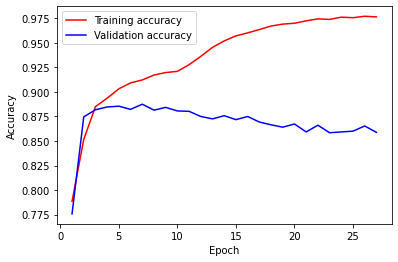

In [ ]:
training_loss = history.history['acc']
validation_loss = history.history['val_acc']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, color = 'red')
plt.plot(epoch_count, validation_loss, color = 'blue')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
model.save('/content/drive/My Drive/hatespeech.h5')
from keras.models import load_model
model1 = load_model('/content/drive/My Drive/hatespeech.h5')
from sklearn.metrics import classification_report
y_test_int = np.argmax(y_test, axis=1)
y_pred = model1.predict(test_padded)

78/78 [==============================] - 8s 88ms/step


In [ ]:
print(classification_report(y_test_int, np.argmax(y_pred, axis = 1),digits=5))

              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       129
           1    0.90976   0.95944   0.93394      1923
           2    0.78714   0.83138   0.80866       427

    accuracy                        0.88745      2479
   macro avg    0.56563   0.59694   0.58087      2479
weighted avg    0.84130   0.88745   0.86376      2479



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


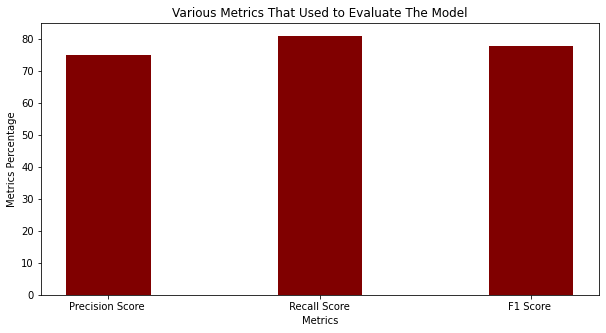

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = {'Precision Score ':75, ' Recall Score ': 81, 'F1 Score ': 78}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='maroon', width = 0.4)
plt.xlabel("Metrics")
plt.ylabel("Metrics Percentage")
plt.title("Various Metrics That Used to Evaluate The Model")
plt.show()


In [ ]:
y_pred

array([[2.5753079e-03, 9.9742466e-01, 6.8659474e-09],
       [6.8185583e-02, 7.5053588e-02, 8.5676086e-01],
       [7.1356893e-02, 7.7807628e-02, 8.5083538e-01],
       ...,
       [2.8017526e-03, 9.9719822e-01, 9.2137649e-09],
       [4.8878910e-03, 9.9511200e-01, 6.4357089e-08],
       [6.8185575e-02, 7.5053580e-02, 8.5676086e-01]], dtype=float32)